# **Welcome to the Notebook**

### Let's mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 47 kB/s 
     |████████████████████████████████| 199 kB 48.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=0b013a6ccefef13470a4c847db5734bb33c47d7d8e81c9d1430b831e2e8877bf
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [ ]:
spark=SparkSession.builder.appName('spark_app').getOrCreate()
spark

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
listening_csv_path='/content/drive/MyDrive/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show(10)

+-----------+-------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|
+-----------+-------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|       Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|   Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count() , len(listening_df.columns))
print(shape)

(13758905, 4)


Save the dataframe to ORC in local

In [ ]:
listening_orc = listening_df.sample(fraction=0.001)
listening_orc.write.orc('listening3.orc')

Convert Spark Dataframe to Pandas Dataframe

In [ ]:
listening_pd_df = listening_orc.toPandas()
listening_pd_df.describe()

,user_id,track,artist,album
count,13584,13584,13584,13584
unique,12401,11864,6286,10231
top,luminol,Intro,David Bowie,Greatest Hits
freq,4,21,67,64


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('track','artist')
q0.show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist=='Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listening_df.select('artist','track').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listening_df.select('artist','track').filter(listening_df.artist=='Rihanna').groupby('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [ ]:
q5 = listening_df.select('artist','album').groupby('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
gener_csv_path='/content/drive/MyDrive/dataset/genre.csv'
gener_df = spark.read.format('csv').option('inferSchema',True).option('header',True).load(gener_csv_path)

let's check the data

In [ ]:
gener_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [ ]:
data = listening_df.join(gener_df,how='inner',on=['artist'])
data.show(10)

+--------+-----------+--------------------+-----------+--------------------+
|  artist|    user_id|               track|      album|               genre|
+--------+-----------+--------------------+-----------+--------------------+
|Jessie J|000Silenced|           Price Tag|Who You Are| Ariana Grande & ...|
|Jessie J|000Silenced|           Price Tag|Who You Are| Jhene Aiko & Rixton|
|Jessie J|000Silenced|           Price Tag|Who You Are| Nicki Minaj & Ar...|
|Jessie J|000Silenced|           Price Tag|Who You Are|                 pop|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Ariana Grande & ...|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Jhene Aiko & Rixton|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Nicki Minaj & Ar...|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag|                 pop|
|   Robyn|000Silenced|Be Mine! (Ballad ...|   Be Mine!|                 pop|
|   Kelis|000Silenced|            Acapella|   Acapella|                 pop|

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 =  data.select('user_id').filter(data.genre=='pop').groupby('user_id').agg(count('*').alias('user_count')).orderBy(desc('user_count')).limit(10)
q6.show()

+---------------+----------+
|        user_id|user_count|
+---------------+----------+
|        01Green|       496|
|      momousagi|       400|
|          mrpsb|       400|
|   BlueKnockOut|       378|
|    musicboy80s|       376|
|  incultojurgis|       374|
| ElektricOrchid|       370|
|foreign_fanatic|       350|
|   Kevin_Soutar|       346|
|  landrover2171|       301|
+---------------+----------+



**Query #7**

find top 10 famous genres

In [ ]:
q7 =  data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id','genre').groupby('genre','user_id').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+--------------------+-------+-----+
|               genre|user_id|count|
+--------------------+-------+-----+
| Tamás Vásáry & Y...| --Seph|    1|
|              trance| --Seph|    1|
|              techno| --Seph|    3|
|          electronic| --Seph|    6|
|               indie| --Seph|    3|
|             baroque| --Seph|    1|
|         folktronica| --Seph|    2|
|                soul| --Seph|    1|
|   progressive house| --Seph|    1|
|            romantic| --Seph|    1|
|              Xzibit| --Seph|    4|
|            new rave| --Seph|    1|
| Charis Henry & M...| --Seph|    4|
|                 pop| --Seph|    9|
|             Rihanna| --Seph|    1|
| Richard Armitage...| --Seph|    1|
|               opera| --Seph|   12|
| Arnór Dan & Doug...| --Seph|    1|
|      children music| --Seph|    1|
|          Thom Yorke| --Seph|    2|
+--------------------+-------+-----+
only showing top 20 rows



In [ ]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select('user_id','max.genre')
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
q9 = gener_df.select('genre').filter((col('genre')=='pop') | (col('genre')=='rock') |(col('genre')=='metal') | (col('genre')=='hip hop')).groupBy('genre').agg(count('*').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()
print(q9_list)

[Row(genre='pop', count=6960), Row(genre='hip hop', count=4288), Row(genre='metal', count=1854), Row(genre='rock', count=9066)]


In [ ]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [ ]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

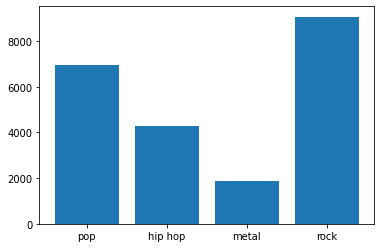

In [ ]:
plts.bar(labels,counts)


**Spark SQL**

In [ ]:
data.createOrReplaceTempView("data")

spark.sql("select artist, count(*) as listen_count from data group by artist order by count(*) desc").show(20)

+--------------+------------+
|        artist|listen_count|
+--------------+------------+
|    Kanye West|      831345|
|        Eminem|      360945|
|       Beyoncé|      270450|
|       Rihanna|      207970|
|Kendrick Lamar|      185504|
|  David Guetta|      180570|
|         Drake|      161777|
|     Daft Punk|      141810|
|   Hans Zimmer|      127032|
| Justin Bieber|       98160|
|     Radiohead|       94618|
|   Max Richter|       92464|
|     Bob Dylan|       86145|
|        Dr Dre|       84600|
| Calvin Harris|       80955|
| Ricky Gervais|       65484|
|   David Bowie|       64056|
|  Lana Del Rey|       63332|
|        Grimes|       62985|
|      Skrillex|       61754|
+--------------+------------+
only showing top 20 rows



In [ ]:
pd_listening = spark.sql("SELECT album, artist, count(distinct track) as total_tracks, count(*) as hit_counts from data group by album, artist order by count(*) desc limit 10000").toPandas()


In [ ]:
pd_listening.describe()

,total_tracks,hit_counts
count,10000.000000,10000.000000
mean,23.272500,1106.689800
std,26.974436,4360.963782
min,1.000000,226.000000
25%,13.000000,308.000000
50%,18.000000,465.000000
75%,28.000000,900.000000
max,1490.000000,334650.000000
